### Import libraries

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

import theano.tensor as T
import theano

Create a dataset with the following code:

In [7]:
trX = np.linspace(-1, 1, 101)

trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):

    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

Now, use Theano to obtain the parameters w_o and w_1 for the following model:

$y = log(1 + w_o|x|) + w_1$

using the data generated above.

In [8]:
# Set X and Y to vectors
X = T.vector()
Y = T.vector()

# Define model using the formula provided
def model(X, w_0, w_1):
    return T.log(1 + (w_0 * abs(X))) + w_1

w_0 = theano.shared(np.array(0., dtype=theano.config.floatX)) # Set weight of X
w_1 = theano.shared(np.array(0., dtype=theano.config.floatX)) # Set constant
y = model(X, w_0, w_1) # Set y equal to the formula provided

cost = T.sqrt(T.mean(T.sqr(y - Y))) # Calculate cost as root mean squared error
grad_w_0 = T.grad(cost, w_0) # Calculate gradients for use in gradient descent
grad_w_1 = T.grad(cost, w_1)
updates = [[w_0, w_0 - grad_w_0 * 0.01], [w_1, w_1 - grad_w_1 * 0.01]] # Define activation function

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates) # Create Theano function to train the model 

predict = theano.function(inputs=[X], outputs=y) # Create Theano function for making predicitons

# Train model with 20000 iterations
num_iterations = 20000
for i in range(num_iterations):
    train(np.asarray(trX), np.asarray(trY)) # Train model converting X and Y to arrays, i.e vectors
        
print('w_0 =', np.round(w_0.get_value(), 4), ', w_1 =', np.round(w_1.get_value(), 4))

w_0 = 0.5127 , w_1 = -0.008


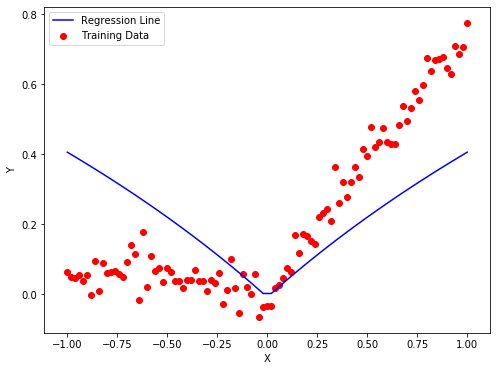

In [9]:
# Plot Regression line
a = np.linspace(min(trX), max(trX))
b = predict(np.asarray(a)) # Use predict function 

# Plot predicted values as a line
plt.figure(figsize=(8,6))
plt.plot(a, b, label='Regression Line', color='b')
plt.scatter(trX, trY, color='r', label='Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()